# Prepare Test Data

In [98]:
import json
import os
import pandas as pd
import numpy as np
from openai import OpenAI

## Load Data

In [2]:
with open("inserted_rules.json", "r", encoding="utf-8") as f:
    rules_list = json.load(f)
df = pd.DataFrame(rules_list)
df.head()

,id,title,date,authority,link,text
0,10039483578855183172,بخشنامه وزير امور اقتصاد و دارايي درخصوص ابلاغ...,1403/12/09,وزارت امور اقتصادي و دارايي,https://qavanin.ir/Law/TreeText/?IDS=100394835...,شوراي ملي تأمين مالي در جلسه مورخ 1403/11/3، ب...
1,7763732820750459420,بخشنامه وزير امور اقتصادي و دارايي در خصوص اصل...,1403/11/02,وزير امور اقتصادي و دارايي,https://qavanin.ir/Law/TreeText/?IDS=776373282...,پيرو دستورالعمل شماره 57427 مورخ 1403/03/30، ب...
2,18423365907747591926,مصوبات دهمين جلسه شوراي ملي تامين مالي,1403/11/01,وزارت امور اقتصادي و دارايي,https://qavanin.ir/Law/TreeText/?IDS=184233659...,پيرو دعوت نامه شماره 80/196961 مورخ 1403/11/1 ...
3,10565502568760114784,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/11/01,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=105655025...,ابلاغ بند 5 نهصد و هشتاد و سومين صورتجلسه هيأت...
4,8335813245330855048,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/10/23,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=833581324...,ابلاغ بند 2 نهصد و هشتاد و يكمين صورتجلسه هيأت...


In [4]:
len(df)

564

In [5]:
df['text_len'] = df['text'].apply(len)
df.head()

,id,title,date,authority,link,text,text_len
0,10039483578855183172,بخشنامه وزير امور اقتصاد و دارايي درخصوص ابلاغ...,1403/12/09,وزارت امور اقتصادي و دارايي,https://qavanin.ir/Law/TreeText/?IDS=100394835...,شوراي ملي تأمين مالي در جلسه مورخ 1403/11/3، ب...,6710
1,7763732820750459420,بخشنامه وزير امور اقتصادي و دارايي در خصوص اصل...,1403/11/02,وزير امور اقتصادي و دارايي,https://qavanin.ir/Law/TreeText/?IDS=776373282...,پيرو دستورالعمل شماره 57427 مورخ 1403/03/30، ب...,721
2,18423365907747591926,مصوبات دهمين جلسه شوراي ملي تامين مالي,1403/11/01,وزارت امور اقتصادي و دارايي,https://qavanin.ir/Law/TreeText/?IDS=184233659...,پيرو دعوت نامه شماره 80/196961 مورخ 1403/11/1 ...,48357
3,10565502568760114784,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/11/01,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=105655025...,ابلاغ بند 5 نهصد و هشتاد و سومين صورتجلسه هيأت...,578
4,8335813245330855048,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/10/23,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=833581324...,ابلاغ بند 2 نهصد و هشتاد و يكمين صورتجلسه هيأت...,1081


## Text Length Histogram

Matplotlib is building the font cache; this may take a moment.


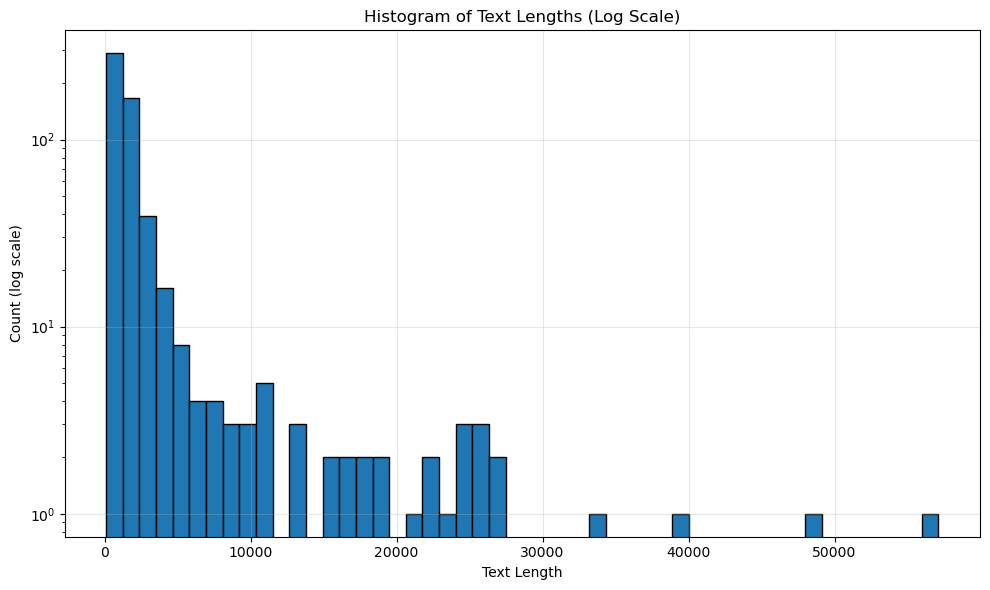

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['text_len'], bins=50, edgecolor='black')
plt.yscale('log')  # Set logarithmic scale for count axis
plt.xlabel('Text Length')
plt.ylabel('Count (log scale)')
plt.title('Histogram of Text Lengths (Log Scale)')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

In [28]:
len(df[(500 < df['text_len']) & (df['text_len'] < 4000)])

445

In [18]:
np.mean(df['text_len'])

2705.5106382978724

In [19]:
np.median(df['text_len'])

1235.5

In [21]:
np.std(df['text_len'])

5530.2607256032015

## Create random sample

In [29]:
test_df = df[(500 < df['text_len']) & (df['text_len'] < 4000)]

In [30]:
test_df.head()

,id,title,date,authority,link,text,text_len
1,7763732820750459420,بخشنامه وزير امور اقتصادي و دارايي در خصوص اصل...,1403/11/02,وزير امور اقتصادي و دارايي,https://qavanin.ir/Law/TreeText/?IDS=776373282...,پيرو دستورالعمل شماره 57427 مورخ 1403/03/30، ب...,721
3,10565502568760114784,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/11/01,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=105655025...,ابلاغ بند 5 نهصد و هشتاد و سومين صورتجلسه هيأت...,578
4,8335813245330855048,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/10/23,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=833581324...,ابلاغ بند 2 نهصد و هشتاد و يكمين صورتجلسه هيأت...,1081
5,134264446149255105,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/10/20,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=134264446...,بند 1 نهصد و هشتادمين صورتجلسة هيئت مديره سازم...,830
6,15968912379000703177,دستور العمل سازمان امور مالياتي در خصوص ترتيبا...,1403/10/17,سازمان امور مالياتي,https://qavanin.ir/Law/TreeText/?IDS=159689123...,با توجه به صدور دادنامه هيئت عمومي ديوان عدالت...,2309


In [31]:
sample_df = test_df.sample(n=50, random_state=42)

In [33]:
sample_df.iloc[0].text

'شوراي اقتصاد در جلسه مورخ 23 /12 /1383،  بنا به درخواست شماره 20924 /11 مورخ 18 /11 /1383 آن وزارتخانه، احداث و بهره برداري منطقه يك آزادراه تهران- شمال به طول سي و دو (32) كيلومتر توسط شركت آزادراه تهران- شمال با استفاده از تسهيلات مالي خارجي را به استناد جزء ۱ بند «ج» ماده ۸۵ قانون برنامه سوم توسعه اقتصادي، اجتماعي و فرهنگي جمهوري اسلامي ايران مورد بررسي قرارداد و ضمن تاييد توجيه فني و اقتصادي طرح مذكور با اجراي آن مشروط به رعايت موارد زير موافقت نمود: 1 (اصلاحي 16ˏ02ˏ1385)– حداكثر مبلغ سي و چهار ميليون و هفتصد و هشتاد و دو هزار و هفتصد و نود و دو (792 /782 /34) دلار به عنوان پيش پرداخت و ميان پرداخت، به علاوه يكصد و هشتاد و هفت ميليون (000 /000 /187) دلار تسهيلات فاينانس به صورت خالص و هزينه هاي تبعي مشتمل بر سود و كارمزد، بيمه و ساير هزينه ها معادل شصت و هفت ميليون و چهارصد و هفتاد و پنج هزار و چهارصد و شصت و نه و سي و سه صدم (33 /469 /475 /67) دلار از محل تسهيلات جزء 1 بند «ز» تبصره 21 قانون بودجه سال 1381 كل كشور، اختصاص يابد. ۲- شرايط زيست محيطي رعايت گردد. ۳- حداقل معادل شصت و

In [42]:
sample_ids = []
for i in range(len(sample_df)):
    sample_ids.append(str(sample_df.iloc[i]['id']))
sample_rules = []
for r in rules_list:
    if r['id'] in sample_ids:
        sample_rules.append(r)
len(sample_rules)

50

In [43]:
with open("sample.json", "w", encoding="utf-8") as f:
    json.dump(sample_rules, f, indent=4, ensure_ascii=False)

## Create noncompliant data

In [ ]:
llm_base_url = os.getenv("LLM_BASE_URL")
llm_api_key = os.getenv("LLM_API_KEY")

client = OpenAI(
  base_url=llm_base_url,
  api_key=llm_api_key,
)

In [101]:
def call_gemini(prompt):
    completion = client.chat.completions.create(
      model="google/gemini-2.5-pro-preview-06-05",
      messages=[
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": prompt
            }
          ]
        }
      ]
    )
    return completion.choices[0].message.content

In [92]:
test_creation_prompt = '''You are an expert in designing test data for regulation compliance analysis. You have to create 4 test data types according to the text of the regulation:
compliant: this is a regulation which is compliant with the provided text
sentence-noncompliant: this is a regulation which is not compliant with the provided text in only one sentence or condition. for this provide sentence-noncompliant-desc (a very short explanation why it is not compliant)
half-noncompliant: this is a regulation which is not compliant with the provided text in about half of the conditions. for this provide half-noncompliant-desc (a very short explanation why it is not compliant)
total-noncompliant: this is a regulation which is not compliant with the provided text at all. for this provide total-noncompliant-desc (a very short explanation why it is not compliant)
try not to change the text too much, change the important logics in order to achieve noncompliance. give the answer in json format. look at the sample to understand better.
<sample>
text = "شوراي اقتصاد در جلسه مورخ 23 /12 /1383،  بنا به درخواست شماره 20924 /11 مورخ 18 /11 /1383 آن وزارتخانه، احداث و بهره برداري منطقه يك آزادراه تهران- شمال به طول سي و دو (32) كيلومتر توسط شركت آزادراه تهران- شمال با استفاده از تسهيلات مالي خارجي را به استناد جزء ۱ بند «ج» ماده ۸۵ قانون برنامه سوم توسعه اقتصادي، اجتماعي و فرهنگي جمهوري اسلامي ايران مورد بررسي قرارداد و ضمن تاييد توجيه فني و اقتصادي طرح مذكور با اجراي آن مشروط به رعايت موارد زير موافقت نمود: 1 (اصلاحي 16ˏ02ˏ1385)– حداكثر مبلغ سي و چهار ميليون و هفتصد و هشتاد و دو هزار و هفتصد و نود و دو (792 /782 /34) دلار به عنوان پيش پرداخت و ميان پرداخت، به علاوه يكصد و هشتاد و هفت ميليون (000 /000 /187) دلار تسهيلات فاينانس به صورت خالص و هزينه هاي تبعي مشتمل بر سود و كارمزد، بيمه و ساير هزينه ها معادل شصت و هفت ميليون و چهارصد و هفتاد و پنج هزار و چهارصد و شصت و نه و سي و سه صدم (33 /469 /475 /67) دلار از محل تسهيلات جزء 1 بند «ز» تبصره 21 قانون بودجه سال 1381 كل كشور، اختصاص يابد. ۲- شرايط زيست محيطي رعايت گردد. ۳- حداقل معادل شصت و پنج درصد (۶۵ ٪) ارزش عمليات اجرايي كل طرح با استفاده از امكانات و توانايي هاي ساخت داخل انجام گيرد. ۴- معادل پنجاه درصد (۵۰ ٪) بازپرداخت تسهيلات دريافتي توسط بنياد مستضعفان و جانبازان تضمين و بازپرداخت گردد. ۵- مبلغ پيش پرداخت و ميان پرداخت تسهيلات مذكور توسط بنياد مستضعفان و جانبازان تامين و پرداخت گردد. ۶- بازپرداخت تسهيلات دريافتي بر اساس جدول پيوست و با تاييد بانك مركزي جمهوري اسلامي ايران انجام شود. ۷- اعتبار اين مصوبه تا زمان گشايش اعتبار اسنادي حداكثر، مدت يك سال از زمان صدور مصوبه مي باشد. ۸ - وزارت راه و ترابري مكلف است، تا شروع بهره برداري از طرح گزارش پيشرفت كار را در مقاطع شش ماهه به سازمان مديريت و برنامه ريزي كشور ارايه نمايد. حميد شركاء معاون رييس جمهور و رييس سازمان اصلاح مصوبه آزادراه تهران – شمال -پيوست مصوبه شماره 27901 /309 مورخ 23 /2 /1385 شوراي اقتصاد زمانبندي بازپرداخت تسهيلات دريافتي واحد: دلار"
test_data = {
    "compliant": "شوراي اقتصاد در جلسه احداث و بهره برداري منطقه يك آزادراه تهران- شمال به طول سي و دو (32) كيلومتر توسط شركت آزادراه تهران- شمال با استفاده از تسهيلات مالي خارجي را به استناد جزء ۱ بند «ج» ماده ۸۵ قانون برنامه سوم توسعه اقتصادي، اجتماعي و فرهنگي جمهوري اسلامي ايران مورد بررسي قرارداد و ضمن تاييد توجيه فني و اقتصادي طرح مذكور با اجراي آن مشروط به رعايت موارد زير موافقت نمود: 1 (اصلاحي 16ˏ02ˏ1385)– حداكثر مبلغ سي و چهار ميليون و هفتصد و هشتاد و دو هزار و هفتصد و نود و دو (792 /782 /34) دلار به عنوان پيش پرداخت و ميان پرداخت، به علاوه يكصد و هشتاد و هفت ميليون (000 /000 /187) دلار تسهيلات فاينانس به صورت خالص و هزينه هاي تبعي مشتمل بر سود و كارمزد، بيمه و ساير هزينه ها معادل شصت و هفت ميليون و چهارصد و هفتاد و پنج هزار و چهارصد و شصت و نه و سي و سه صدم (33 /469 /475 /67) دلار از محل تسهيلات جزء 1 بند «ز» تبصره 21 قانون بودجه سال 1381 كل كشور، اختصاص يابد. ۲- شرايط زيست محيطي رعايت گردد. ۳- حداقل معادل هشتاد و پنج درصد (۸۵ ٪) ارزش عمليات اجرايي كل طرح با استفاده از امكانات و توانايي هاي ساخت داخل انجام گيرد. ۴- معادل پنجاه درصد (۵۰ ٪) بازپرداخت تسهيلات دريافتي توسط بنياد مستضعفان و جانبازان تضمين و بازپرداخت گردد. ۵- مبلغ پيش پرداخت و ميان پرداخت تسهيلات مذكور توسط بنياد مستضعفان و جانبازان تامين و پرداخت گردد. ۶- بازپرداخت تسهيلات دريافتي بر اساس جدول پيوست و با تاييد بانك مركزي جمهوري اسلامي ايران انجام شود. ۷- اعتبار اين مصوبه تا زمان گشايش اعتبار اسنادي حداكثر، مدت يك سال از زمان صدور مصوبه مي باشد. ۸ - وزارت راه و ترابري مكلف است، تا شروع بهره برداري از طرح گزارش پيشرفت كار را در مقاطع شش ماهه به سازمان مديريت و برنامه ريزي كشور ارايه نمايد. واحد: دلار",
    "sentence-noncompliant": "شوراي اقتصاد در جلسه احداث و بهره برداري منطقه يك آزادراه تهران- شمال به طول سي و دو (32) كيلومتر توسط شركت آزادراه تهران- شمال با استفاده از تسهيلات مالي خارجي را به استناد جزء ۱ بند «ج» ماده ۸۵ قانون برنامه سوم توسعه اقتصادي، اجتماعي و فرهنگي جمهوري اسلامي ايران مورد بررسي قرارداد و ضمن تاييد توجيه فني و اقتصادي طرح مذكور با اجراي آن مشروط به رعايت موارد زير موافقت نمود: 1 (اصلاحي 16ˏ02ˏ1385)– حداكثر مبلغ سي و چهار ميليون و هفتصد و هشتاد و دو هزار و هفتصد و نود و دو (792 /782 /34) دلار به عنوان پيش پرداخت و ميان پرداخت، به علاوه يكصد و هشتاد و هفت ميليون (000 /000 /187) دلار تسهيلات فاينانس به صورت خالص و هزينه هاي تبعي مشتمل بر سود و كارمزد، بيمه و ساير هزينه ها معادل شصت و هفت ميليون و چهارصد و هفتاد و پنج هزار و چهارصد و شصت و نه و سي و سه صدم (33 /469 /475 /67) دلار از محل تسهيلات جزء 1 بند «ز» تبصره 21 قانون بودجه سال 1381 كل كشور، اختصاص يابد. ۲- نیازی به رعایت شرايط زيست محيطي نیست. ۳- حداقل معادل شصت و پنج درصد (۶۵ ٪) ارزش عمليات اجرايي كل طرح با استفاده از امكانات و توانايي هاي ساخت داخل انجام گيرد. ۴- معادل پنجاه درصد (۵۰ ٪) بازپرداخت تسهيلات دريافتي توسط بنياد مستضعفان و جانبازان تضمين و بازپرداخت گردد. ۵- مبلغ پيش پرداخت و ميان پرداخت تسهيلات مذكور توسط بنياد مستضعفان و جانبازان تامين و پرداخت گردد. ۶- بازپرداخت تسهيلات دريافتي بر اساس جدول پيوست و با تاييد بانك مركزي جمهوري اسلامي ايران انجام شود. ۷- اعتبار اين مصوبه تا زمان گشايش اعتبار اسنادي حداكثر، مدت يك سال از زمان صدور مصوبه مي باشد. ۸ - وزارت راه و ترابري مكلف است، تا شروع بهره برداري از طرح گزارش پيشرفت كار را در مقاطع شش ماهه به سازمان مديريت و برنامه ريزي كشور ارايه نمايد. واحد: دلار",
    "sentence-noncompliant-desc": "به جز رعایت شرایط زیست محیطی بقیه موارد منطبق است.",
    "half-noncompliant": "شوراي اقتصاد در جلسه احداث و بهره برداري منطقه يك آزادراه تهران- شمال به طول سي و دو (32) كيلومتر توسط شركت آزادراه تهران- شمال با استفاده از تسهيلات مالي خارجي را به استناد جزء ۱ بند «ج» ماده ۸۵ قانون برنامه سوم توسعه اقتصادي، اجتماعي و فرهنگي جمهوري اسلامي ايران مورد بررسي قرارداد و ضمن تاييد توجيه فني و اقتصادي طرح مذكور با اجراي آن مشروط به رعايت موارد زير موافقت نمود: 1 (اصلاحي 16ˏ02ˏ1385)– حداكثر مبلغ سي و چهار ميليون و هفتصد و هشتاد و دو هزار و هفتصد و نود و دو (792 /782 /34) دلار به عنوان پيش پرداخت و ميان پرداخت، به علاوه يكصد و هشتاد و هفت ميليون (000 /000 /187) دلار تسهيلات فاينانس به صورت خالص و هزينه هاي تبعي مشتمل بر سود و كارمزد، بيمه و ساير هزينه ها معادل شصت و هفت ميليون و چهارصد و هفتاد و پنج هزار و چهارصد و شصت و نه و سي و سه صدم (33 /469 /475 /67) دلار از محل تسهيلات جزء 1 بند «ز» تبصره 21 قانون بودجه سال 1381 كل كشور، اختصاص يابد. ۲- نیازی به رعایت شرايط زيست محيطي نیست. ۳- حداقل معادل پنج درصد (۵ ٪) ارزش عمليات اجرايي كل طرح با استفاده از امكانات و توانايي هاي ساخت داخل انجام گيرد. ۴- معادل ده درصد (۱۰ ٪) بازپرداخت تسهيلات دريافتي توسط بنياد مستضعفان و جانبازان تضمين و بازپرداخت گردد. ۵- مبلغ پيش پرداخت و ميان پرداخت تسهيلات مذكور توسط وزارت راه و شهرسازی تامين و پرداخت گردد. ۶- بازپرداخت تسهيلات دريافتي بر اساس جدول پيوست و با تاييد بانك مركزي جمهوري اسلامي ايران انجام شود. ۷- اعتبار اين مصوبه تا زمان گشايش اعتبار اسنادي حداكثر، مدت يك سال از زمان صدور مصوبه مي باشد. ۸ - وزارت راه و ترابري مكلف است، تا شروع بهره برداري از طرح گزارش پيشرفت كار را در مقاطع شش ماهه به سازمان مديريت و برنامه ريزي كشور ارايه نمايد. واحد: دلار",
    "half-noncompliant-desc": "این موارد منطبق با قوانین نیست: ۱. شرایط زیست محیطی ۲. میزان استفاده از امکانات و توانایی های ساخت داخل ۳. میزان بازپرداخت تسهیلات دریافتی توسط بنیاد مستضعفان ۴. نهادی که مبلغ پیش پرداخت و میان پرداخت را پرداخت می‌کند (از بنیاد مستضعفان به وزارت راه و شهرسازی تغییر یافته است)",
    "total-noncompliant": "شوراي اقتصاد در جلسه احداث و بهره برداري منطقه يك آزادراه تهران- شمال به طول سي و دو (32) كيلومتر توسط شركت آزادراه تهران- شمال با استفاده از تسهيلات مالي خارجي را به استناد جزء ۱ بند «ج» ماده ۸۵ قانون برنامه سوم توسعه اقتصادي، اجتماعي و فرهنگي جمهوري اسلامي ايران مورد بررسي قرارداد و ضمن تاييد توجيه فني و اقتصادي طرح مذكور با اجراي آن مشروط به رعايت موارد زير موافقت نمود: 1 - به هر میزان تسهیلات مورد نیاز پرداخت می‌شود. ۲- نیاز به رعایت هیچ شرایط خاصی نیست. ۳- نیازی به استفاده از زیرساخت و توانایی داخلی نیست. ۴- بازپرداخت تسهيلات دريافتي توسط وزارت راه و شهرسازی تضمين و بازپرداخت گردد. ۵- مبلغ پيش پرداخت و ميان پرداخت تسهيلات مذكور توسط وزارت راه و شهرسازی تامين و پرداخت گردد. ۶- بازپرداخت تسهيلات دريافتي به هر شکل پرداخت شود و نیازی به رعایت مورد خاصی نیست. ۷- اعتبار اين مصوبه نامحدود است. ۸ - نیازی به گزارش میزان پیشرفت پروژه نیست. واحد: دلار",
    "total-noncompliant-desc": "با قوانین منطبق نیست و هیچ کدام از شروط احداث آزادراه بیان نشده است."
}
</sample>
now create test data for this:
text = "text_placeholder"'''

In [119]:
for i in range(len(sample_rules)):
    if i in [0, 1, 30]:
        continue
    prompt = test_creation_prompt.replace("text_placeholder", sample_rules[i]["text"])
    result = call_gemini(prompt)
    test_data = json.loads(result.replace("json", "").replace("```", ""))
    sample_rules[i].update(test_data)
    print(f'created test data for {i}')

created test data for 2
created test data for 3
created test data for 4
created test data for 5
created test data for 6
created test data for 7
created test data for 8
created test data for 9
created test data for 10
created test data for 11
created test data for 12
created test data for 13
created test data for 14
created test data for 15
created test data for 16
created test data for 17
created test data for 18
created test data for 19
created test data for 20
created test data for 21
created test data for 22
created test data for 23
created test data for 24
created test data for 25
created test data for 26
created test data for 27
created test data for 28
created test data for 29
created test data for 31
created test data for 32
created test data for 33
created test data for 34
created test data for 35
created test data for 36
created test data for 37
created test data for 38
created test data for 39
created test data for 40
created test data for 41
created test data for 42
created 

In [120]:
with open("test_data_sample.json", "w", encoding="utf-8") as f:
    json.dump(sample_rules, f, indent=4, ensure_ascii=False)

In [122]:
test_data_df = pd.DataFrame(sample_rules)

In [124]:
test_data_df.head()

,id,title,date,authority,link,text,compliant,sentence-noncompliant,sentence-noncompliant-desc,half-noncompliant,half-noncompliant-desc,total-noncompliant,total-noncompliant-desc
0,168105800935523098,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/07/03,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=168105800...,بند ۲ نهصد و پنجاه و هفتمين صورتجلسه هيئت مدير...,پیرو نامه شماره ۱۲۱/۲۷۰۰۷۷ مورخ ۱۴۰۳/۰۴/۱۳ در ...,پیرو نامه شماره ۱۲۱/۲۷۰۰۷۷ مورخ ۱۴۰۳/۰۴/۱۳ در ...,مهلت تعیین شده برای فروش سهام (یک سال) با مهلت...,پیرو نامه شماره ۱۲۱/۲۷۰۰۷۷ مورخ ۱۴۰۳/۰۴/۱۳ در ...,موارد زیر با مصوبه اصلی مغایرت دارد: ۱. نام شر...,پیرو نامه شماره ۱۲۱/۲۷۰۰۷۷ مورخ ۱۴۰۳/۰۴/۱۳، هی...,این متن کاملاً نامنطبق است؛ اصل مصوبه که موافق...
1,10881107711898648217,ابلاغ بخشنامه شماره (1) اجراي برنامه اقدام سند...,1403/03/23,وزارت امور اقتصادي و دارايي,https://qavanin.ir/Law/TreeText/?IDS=108811077...,نظر به اينكه اجراي برنامه اقدام مرتبط با سند م...,نظر به اينكه اجراي برنامه اقدام مرتبط با سند م...,نظر به اينكه اجراي برنامه اقدام مرتبط با سند م...,مغایرت در بند ۴: شرط استعلام صحت وکالتنامه رسم...,نظر به اينكه اجراي برنامه اقدام مرتبط با سند م...,در موارد ۱ و ۲ و ۳ و ۶ با متن اصلی مغایرت دارد...,نظر به اينكه اجراي برنامه اقدام مرتبط با سند م...,تقریباً تمام بندهای ابلاغیه اصلی، از جمله شناس...
2,14577431515650319208,مصوبه هيأت مديره سازمان بورس و اوراق بهادار در...,1403/02/23,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=145774315...,بند 1 نهصد و سي و دومين صورتجلسه هيئت مديره سا...,بند 1 نهصد و سي و دومين صورتجلسه هيئت مديره سا...,بند 1 نهصد و سي و دومين صورتجلسه هيئت مديره سا...,سقف انتشار اوراق به جای تعیین بر اساس جدول بان...,بند 1 نهصد و سي و دومين صورتجلسه هيئت مديره سا...,مبنای قانونی (قانون تجارت) و نحوه تعیین سقف (د...,بنا بر اطلاعيه مديريت نظارت بر بازار اوليه مور...,این متن به طور کامل با قانون اصلی در تضاد است ...
3,17349917818789608910,بخشنامه سازمان امور مالياتي درخصوص رفع ابهام ا...,1402/12/28,سازمان امور مالياتي,https://qavanin.ir/Law/TreeText/?IDS=173499178...,به منظور ايجاد وحدت رويه در محاسبه جرائم موضوع...,به منظور ايجاد وحدت رويه در محاسبه جرائم موضوع...,به منظور ايجاد وحدت رويه در محاسبه جرائم موضوع...,در بند ۴، جریمه ماده ۳۵ پس از استقرار سامانه م...,به منظور ايجاد وحدت رويه در محاسبه جرائم موضوع...,در بند ۱، مأخذ محاسبه جریمه از «مالیات پرداخت ...,به منظور ايجاد وحدت رويه در محاسبه جرائم موضوع...,متن در تمام بندها با بخشنامه اصلی مغایرت دارد:...
4,6627930918218609784,مصوبه سازمان بورس و اوراق بهادار در خصوص اصلاح...,1402/08/04,هيات مديره سازمان بورس و اوراق بهادار,https://qavanin.ir/Law/TreeText/?IDS=662793091...,هشتصد و نود و هشتمين صورتجلسة هيئت مديره سازما...,هشتصد و نود و هشتمين صورتجلسة هيئت مديره سازما...,هشتصد و نود و هشتمين صورتجلسة هيئت مديره سازما...,برخلاف متن اصلی که مصوبه را تایید می‌کند، در ا...,هشتصد و نود و هشتمين صورتجلسة هيئت مديره سازما...,تاریخ جلسه، نهاد پیشنهاد دهنده، موضوع پیشنهاد ...,در جلسه مورخ ۰۴ /۰۸ /۱۴۰۲، وزارت امور اقتصادی ...,این متن به طور کامل با مصوبه اصلی در تضاد است؛...
